In [1]:
pip install numpy pandas scikit-learn pyarrow

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler

# Ensure the Parquet files 'recipes.parquet' and 'reviews.parquet' are in your working directory.
try:
    recipes_df = pd.read_parquet("recipes.parquet")
    reviews_df = pd.read_parquet("reviews.parquet")
except Exception as e:
    print(f"An error occurred: {e}")

In [2]:
recipes_df.head()

,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,...,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield,RecipeInstructions
0,38.0,Low-Fat Berry Blue Frozen Dessert,1533,Dancer,PT24H,PT45M,PT24H45M,1999-08-09 21:46:00+00:00,Make and share this Low-Fat Berry Blue Frozen ...,[https://img.sndimg.com/food/image/upload/w_55...,...,1.3,8.0,29.8,37.1,3.6,30.2,3.2,4.0,None,"[Toss 2 cups berries with sugar., Let stand fo..."
1,39.0,Biryani,1567,elly9812,PT25M,PT4H,PT4H25M,1999-08-29 13:12:00+00:00,Make and share this Biryani recipe from Food.com.,[https://img.sndimg.com/food/image/upload/w_55...,...,16.6,372.8,368.4,84.4,9.0,20.4,63.4,6.0,None,[Soak saffron in warm milk for 5 minutes and p...
2,40.0,Best Lemonade,1566,Stephen Little,PT5M,PT30M,PT35M,1999-09-05 19:52:00+00:00,This is from one of my first Good House Keepi...,[https://img.sndimg.com/food/image/upload/w_55...,...,0.0,0.0,1.8,81.5,0.4,77.2,0.3,4.0,None,"[Into a 1 quart Jar with tight fitting lid, pu..."
3,41.0,Carina's Tofu-Vegetable Kebabs,1586,Cyclopz,PT20M,PT24H,PT24H20M,1999-09-03 14:54:00+00:00,This dish is best prepared a day in advance to...,[https://img.sndimg.com/food/image/upload/w_55...,...,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,2.0,4 kebabs,"[Drain the tofu, carefully squeezing out exces..."
4,42.0,Cabbage Soup,1538,Duckie067,PT30M,PT20M,PT50M,1999-09-19 06:19:00+00:00,Make and share this Cabbage Soup recipe from F...,[https://img.sndimg.com/food/image/upload/w_55...,...,0.1,0.0,959.3,25.1,4.8,17.7,4.3,4.0,None,"[Mix everything together and bring to a boil.,..."


In [3]:
reviews_df.head()

,ReviewId,RecipeId,AuthorId,AuthorName,Rating,Review,DateSubmitted,DateModified
0,2,992,2008,gayg msft,5,better than any you can get at a restaurant!,2000-01-25 21:44:00+00:00,2000-01-25 21:44:00+00:00
1,7,4384,1634,Bill Hilbrich,4,"I cut back on the mayo, and made up the differ...",2001-10-17 16:49:59+00:00,2001-10-17 16:49:59+00:00
2,9,4523,2046,Gay Gilmore ckpt,2,i think i did something wrong because i could ...,2000-02-25 09:00:00+00:00,2000-02-25 09:00:00+00:00
3,13,7435,1773,Malarkey Test,5,easily the best i have ever had. juicy flavor...,2000-03-13 21:15:00+00:00,2000-03-13 21:15:00+00:00
4,14,44,2085,Tony Small,5,An excellent dish.,2000-03-28 12:51:00+00:00,2000-03-28 12:51:00+00:00


Pre-processing

In [4]:
nutritional_cols = ["RecipeId", "Name", "Calories", "FatContent", "SaturatedFatContent", "CholesterolContent", "SodiumContent", "CarbohydrateContent", "FiberContent", "SugarContent", "ProteinContent", "RecipeServings"]
nutritional_df = recipes_df[nutritional_cols]

In [5]:
nutritional_df.head()

,RecipeId,Name,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings
0,38.0,Low-Fat Berry Blue Frozen Dessert,170.9,2.5,1.3,8.0,29.8,37.1,3.6,30.2,3.2,4.0
1,39.0,Biryani,1110.7,58.8,16.6,372.8,368.4,84.4,9.0,20.4,63.4,6.0
2,40.0,Best Lemonade,311.1,0.2,0.0,0.0,1.8,81.5,0.4,77.2,0.3,4.0
3,41.0,Carina's Tofu-Vegetable Kebabs,536.1,24.0,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,2.0
4,42.0,Cabbage Soup,103.6,0.4,0.1,0.0,959.3,25.1,4.8,17.7,4.3,4.0


In [6]:
nutritional_df = nutritional_df.dropna(axis=0)

In [7]:
cols_to_divide = ["Calories", "FatContent", "SaturatedFatContent", "CholesterolContent", "SodiumContent", "CarbohydrateContent", "FiberContent", "SugarContent", "ProteinContent"]
nutritional_df[cols_to_divide] = nutritional_df[cols_to_divide].div(nutritional_df["RecipeServings"], axis=0)
nutritional_df.drop("RecipeServings", axis=1)

,RecipeId,Name,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent
0,38.0,Low-Fat Berry Blue Frozen Dessert,42.725000,0.625000,0.325000,2.000000,7.450000,9.275000,0.900000,7.550000,0.800000
1,39.0,Biryani,185.116667,9.800000,2.766667,62.133333,61.400000,14.066667,1.500000,3.400000,10.566667
2,40.0,Best Lemonade,77.775000,0.050000,0.000000,0.000000,0.450000,20.375000,0.100000,19.300000,0.075000
3,41.0,Carina's Tofu-Vegetable Kebabs,268.050000,12.000000,1.900000,0.000000,779.300000,32.100000,8.650000,16.050000,14.650000
4,42.0,Cabbage Soup,25.900000,0.100000,0.025000,0.000000,239.825000,6.275000,1.200000,4.425000,1.075000
...,...,...,...,...,...,...,...,...,...,...,...
522509,541376.0,Spanish Coffee with Tia Maria,84.300000,2.100000,1.200000,6.800000,15.700000,16.600000,0.400000,15.400000,0.600000
522510,541377.0,Slow-Cooker Classic Coffee Cake,29.908333,1.650000,0.875000,8.591667,26.950000,3.458333,0.066667,2.066667,0.400000
522512,541379.0,Meg's Fresh Ginger Gingerbread,39.575000,1.562500,0.950000,6.800000,34.775000,6.062500,0.100000,2.850000,0.487500
522513,541380.0,Roast Prime Rib au Poivre with Mixed Peppercorns,257.925000,21.550000,8.925000,54.225000,95.787500,0.400000,0.087500,0.012500,14.625000


Train a kNN model to identify the 50 most similar recipes to a given recipe

In [8]:
class RecipeRecommender:
    def __init__(self, nutritional_df, cols_to_divide):
        self.original_nutritional_df = nutritional_df
        self.nutritional_df = nutritional_df.copy()
        self.cols_to_divide = cols_to_divide
        
        # normalize the attributes
        self.scaler = MinMaxScaler()
        self.nutritional_df[self.cols_to_divide] = self.scaler.fit_transform(self.nutritional_df[self.cols_to_divide])
        
        self.knn = NearestNeighbors(metric='euclidean')
        self.knn.fit(self.nutritional_df[self.cols_to_divide])

    def find_closest_recipes(self, recipe_id, k=50):
        input_recipe = self.nutritional_df.loc[self.nutritional_df["RecipeId"] == recipe_id, self.cols_to_divide]
        distances, indices = self.knn.kneighbors(input_recipe, n_neighbors=k+1)  # +1 to exclude the recipe itself
        
        closest_indices = indices[0][1:]  # Exclude the first element (recipe itself)
        return self.original_nutritional_df.iloc[closest_indices]

    def get_trained_model(self):
        return self.knn

In [9]:
# Initialize the RecipeRecommender with the prepared nutritional_df
recommender_knn = RecipeRecommender(nutritional_df, cols_to_divide)

In [10]:
# Find the closest recipes for a given input recipe
input_recipe_id = 41.0 # enter the input recipe number here
result = recommender_knn.find_closest_recipes(input_recipe_id)
print("Closest recipes for RecipeId", input_recipe_id, "from the original nutritional_df:")
result

Closest recipes for RecipeId 41.0 from the original nutritional_df:


,RecipeId,Name,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings
515719,534346.0,Lower Carb Bread/Hogie Roll,434.500000,11.800,1.550,0.000,594.550000,70.000,8.700,0.850,14.900000,2.0
373563,387075.0,Banana Almond Date Soy Smoothie,340.400000,12.600,1.300,0.000,184.200000,48.000,8.600,21.600,15.600000,1.0
447139,463666.0,David Lynch's Quinoa,383.500000,10.000,1.300,0.000,622.900000,60.600,8.300,1.600,14.600000,1.0
388519,402507.0,Middle Eastern Tahini Oatmeal (Vegan),452.100000,11.800,1.600,0.000,134.400000,74.300,8.400,36.200,15.600000,1.0
196841,205476.0,Muesli With Yogurt and Cashews,413.300000,12.900,2.300,0.000,72.700000,64.300,9.200,22.600,15.500000,1.0
432529,448549.0,Long Run Recovery Banana Berry Smoothie,359.000000,10.700,1.500,5.500,173.200000,58.200,7.700,32.500,13.600000,1.0
508414,526899.0,Zero Calorie Baked Pasta Bolognese,278.050000,11.350,2.350,8.550,216.650000,33.550,9.700,4.950,12.750000,2.0
405403,420242.0,Apple Cherry Oatmeal,425.000000,10.700,1.400,0.000,7.500000,70.600,9.600,16.700,14.500000,1.0
363473,376719.0,Pomodoro Pasta With White Beans and Olives,354.000000,9.650,1.400,0.000,447.200000,53.900,10.050,2.500,15.150000,2.0
472005,489403.0,Greek Quinoa Salad,404.450000,12.300,3.100,11.100,884.050000,59.850,7.250,2.300,14.850000,2.0


In [11]:
pip install faiss-cpu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 11.1 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [12]:
#pip install faiss-gpu

In [15]:
import faiss
import numpy as np
import pandas as pd

class FAISSRecipeRecommender:
    def __init__(self, nutritional_df, cols_to_divide):
        self.original_nutritional_df = nutritional_df
        self.nutritional_df = nutritional_df.copy()
        self.cols_to_divide = cols_to_divide
        
        # Normalize attributes
        scaler = MinMaxScaler()
        self.nutritional_df[self.cols_to_divide] = scaler.fit_transform(self.nutritional_df[self.cols_to_divide])

        # Convert DataFrame to numpy array
        recipe_vectors = self.nutritional_df[self.cols_to_divide].values.astype(np.float32)

        # Build the index
        self.index = faiss.IndexFlatL2(recipe_vectors.shape[1])
        self.index.add(recipe_vectors)

    def find_closest_recipes(self, recipe_id, k=50):
        input_recipe = self.nutritional_df.loc[self.nutritional_df["RecipeId"] == recipe_id, self.cols_to_divide].values.astype(np.float32)
        distances, indices = self.index.search(input_recipe, k+1)
        
        closest_indices = indices[0][1:]  # Exclude the recipe itself
        return self.original_nutritional_df.iloc[closest_indices]

# Initialize and use the FAISS-based recommender in the same way as before
recommender_faiss = FAISSRecipeRecommender(nutritional_df, cols_to_divide)

In [16]:
# Find the closest recipes for a given input recipe
input_recipe_id = 41.0 # enter the input recipe number here
result = recommender_faiss.find_closest_recipes(input_recipe_id)
print("Closest recipes for RecipeId", input_recipe_id, "from the original nutritional_df:")
result

Closest recipes for RecipeId 41.0 from the original nutritional_df:


,RecipeId,Name,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings
515719,534346.0,Lower Carb Bread/Hogie Roll,434.500000,11.800,1.550,0.000,594.550000,70.000,8.700,0.850,14.900000,2.0
373563,387075.0,Banana Almond Date Soy Smoothie,340.400000,12.600,1.300,0.000,184.200000,48.000,8.600,21.600,15.600000,1.0
447139,463666.0,David Lynch's Quinoa,383.500000,10.000,1.300,0.000,622.900000,60.600,8.300,1.600,14.600000,1.0
388519,402507.0,Middle Eastern Tahini Oatmeal (Vegan),452.100000,11.800,1.600,0.000,134.400000,74.300,8.400,36.200,15.600000,1.0
196841,205476.0,Muesli With Yogurt and Cashews,413.300000,12.900,2.300,0.000,72.700000,64.300,9.200,22.600,15.500000,1.0
432529,448549.0,Long Run Recovery Banana Berry Smoothie,359.000000,10.700,1.500,5.500,173.200000,58.200,7.700,32.500,13.600000,1.0
508414,526899.0,Zero Calorie Baked Pasta Bolognese,278.050000,11.350,2.350,8.550,216.650000,33.550,9.700,4.950,12.750000,2.0
405403,420242.0,Apple Cherry Oatmeal,425.000000,10.700,1.400,0.000,7.500000,70.600,9.600,16.700,14.500000,1.0
363473,376719.0,Pomodoro Pasta With White Beans and Olives,354.000000,9.650,1.400,0.000,447.200000,53.900,10.050,2.500,15.150000,2.0
472005,489403.0,Greek Quinoa Salad,404.450000,12.300,3.100,11.100,884.050000,59.850,7.250,2.300,14.850000,2.0


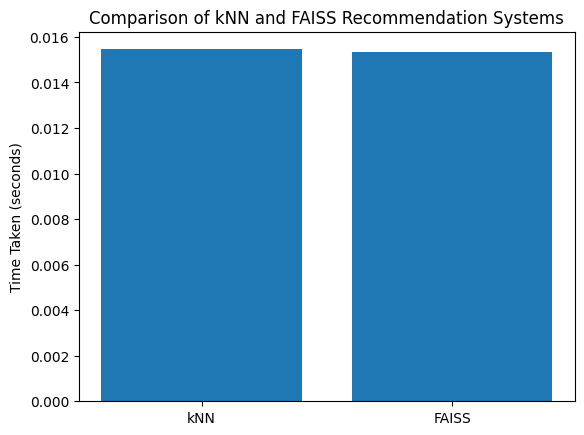

In [17]:
import time
import matplotlib.pyplot as plt

# Assuming recommender_knn and recommender_faiss are instances of RecipeRecommender and FAISSRecipeRecommender respectively
# and input_recipe_id is the ID of the recipe you're comparing

# Timing kNN recommender
start_time = time.time()
recommender_knn.find_closest_recipes(input_recipe_id)
knn_time = time.time() - start_time

# Timing FAISS recommender
start_time = time.time()
recommender_faiss.find_closest_recipes(input_recipe_id)
faiss_time = time.time() - start_time

# Plotting the comparison
plt.bar(['kNN', 'FAISS'], [knn_time, faiss_time])
plt.ylabel('Time Taken (seconds)')
plt.title('Comparison of kNN and FAISS Recommendation Systems')
plt.show()

In [18]:
input_recipe_id = 41.0  # Example recipe ID

# Get top 5 recommendations from both systems
top_k = 5
knn_recommendations = recommender_knn.find_closest_recipes(input_recipe_id, k=top_k)
faiss_recommendations = recommender_faiss.find_closest_recipes(input_recipe_id, k=top_k)


In [19]:
# Extracting nutritional information
knn_nutrition = knn_recommendations[['Calories', 'FatContent']]
faiss_nutrition = faiss_recommendations[['Calories', 'FatContent']]

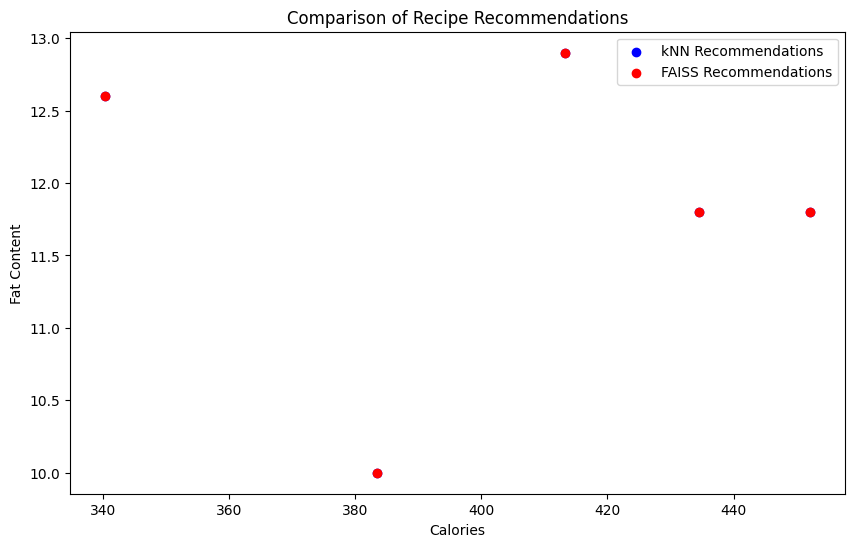

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plotting kNN recommendations
plt.scatter(knn_nutrition['Calories'], knn_nutrition['FatContent'], color='blue', label='kNN Recommendations')

# Plotting FAISS recommendations
plt.scatter(faiss_nutrition['Calories'], faiss_nutrition['FatContent'], color='red', label='FAISS Recommendations')

plt.xlabel('Calories')
plt.ylabel('Fat Content')
plt.title('Comparison of Recipe Recommendations')
plt.legend()
plt.show()


The two recommendation systems you provided – one based on k-Nearest Neighbors (kNN) and the other on Facebook AI Similarity Search (FAISS) – are both designed to find the most similar recipes based on nutritional content. However, they differ significantly in their approach and underlying technology. Let's break down the key differences:

k-Nearest Neighbors (kNN) based Recommender:
Technology: Utilizes the traditional kNN algorithm from scikit-learn, a popular machine learning library in Python.
Approach: Calculates the distance (Euclidean in this case) between the nutritional content of recipes. It finds the k closest recipes to a given recipe based on these distances.
Performance: More suited for smaller datasets. The computational cost increases with the number of data points, which can become a bottleneck for large datasets.
Scalability: Limited scalability due to the computational and memory overhead with large datasets.
Simplicity: Easier to understand and implement, especially for those familiar with basic machine learning concepts.
Use Case: Ideal for small to medium datasets where the computational overhead is manageable.

FAISS based Recommender:
Technology: Leverages FAISS (Facebook AI Similarity Search), an advanced library specifically designed for efficient similarity search and clustering of dense vectors.
Approach: Like kNN, it computes the similarity between recipes based on their nutritional content but does so much more efficiently, especially in high-dimensional spaces.
Performance: Highly optimized for large datasets. FAISS uses optimized algorithms and data structures to accelerate search, making it much faster than traditional methods for large-scale data.
Scalability: Excellent scalability. FAISS is designed to work efficiently with very large datasets, often used in industrial applications and research.
Complexity: Slightly more complex to set up and understand, especially for those new to FAISS or similarity search algorithms.
Use Case: Best suited for large datasets where traditional methods like kNN become too slow or computationally expensive.

Summary of Differences:
Performance & Scalability: FAISS offers superior performance and scalability, particularly for large datasets, while kNN is more suited for smaller datasets.
Complexity: kNN is simpler and more straightforward, while FAISS, though more complex, provides advanced capabilities for handling large-scale data efficiently.
Applicability: FAISS is ideal for scenarios where speed and handling large amounts of data are critical, whereas kNN is sufficient for smaller, less complex datasets.
In summary, your choice between kNN and FAISS should be guided by the size of your dataset and your performance requirements. For smaller datasets or simpler applications, kNN is a great choice. For larger datasets or applications where performance is critical, FAISS is the better option.

In [21]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [22]:
from sklearn.neighbors import NearestNeighbors, KDTree, BallTree
import numpy as np
import pandas as pd

# Example DataFrame with nutritional information
# nutritional_df should already be prepared with the required preprocessing steps

# Feature columns to consider for the recommendation
feature_columns = ["Calories", "FatContent", "SaturatedFatContent", "CholesterolContent", "SodiumContent", "CarbohydrateContent", "FiberContent", "SugarContent", "ProteinContent"]

# Extracting the feature data for the nearest neighbors search
X = nutritional_df[feature_columns].values

# Number of nearest neighbors to find
n_neighbors = 5

# BallTree
ball_tree = NearestNeighbors(n_neighbors=n_neighbors, algorithm='ball_tree')
ball_tree.fit(X)
distances, indices = ball_tree.kneighbors(X)
print("BallTree Recommendations:")
print(nutritional_df.iloc[indices[0]])  # Assuming you want the neighbors for the first recipe

# KDTree
kd_tree = NearestNeighbors(n_neighbors=n_neighbors, algorithm='kd_tree')
kd_tree.fit(X)
distances, indices = kd_tree.kneighbors(X)
print("\nKDTree Recommendations:")
print(nutritional_df.iloc[indices[0]])  # Assuming you want the neighbors for the first recipe

# Brute-force
brute_force = NearestNeighbors(n_neighbors=n_neighbors, algorithm='brute')
brute_force.fit(X)
distances, indices = brute_force.kneighbors(X)
print("\nBrute-force Recommendations:")
print(nutritional_df.iloc[indices[0]])  # Assuming you want the neighbors for the first recipe

BallTree Recommendations:
        RecipeId                               Name   Calories  FatContent  \
0           38.0  Low-Fat Berry Blue Frozen Dessert  42.725000       0.625   
368127  381507.0                   Summer Berry Pie  43.066667       0.900   
377189  390800.0             Simple Cinnamon Apples  43.300000       0.800   
225278  234753.0           Tangy Berry Melon Cooler  43.066667       0.500   
196496  205120.0     Orange Julius Blender Beverage  43.400000       0.575   

        SaturatedFatContent  CholesterolContent  SodiumContent  \
0                  0.325000            2.000000       7.450000   
368127             0.466667            2.600000       7.966667   
377189             0.475000            1.900000       7.775000   
225278             0.300000            1.766667       7.900000   
196496             0.350000            2.125000       8.450000   

        CarbohydrateContent  FiberContent  SugarContent  ProteinContent  \
0                  9.275000      

<module 'matplotlib.pyplot' from '/Users/jyotisjoy/anaconda3/lib/python3.11/site-packages/matplotlib/pyplot.py'>

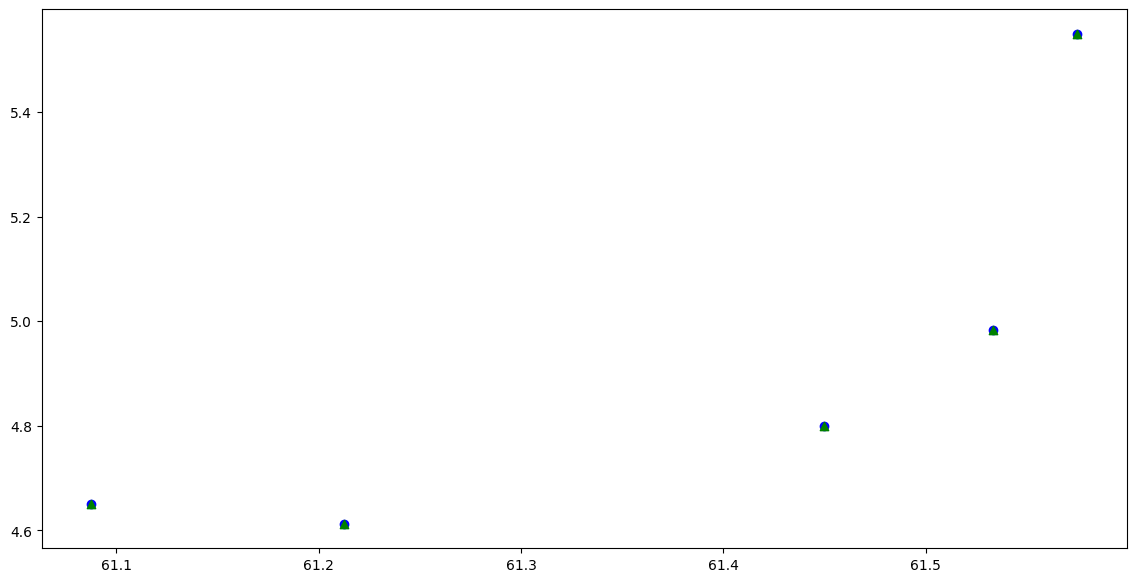

In [24]:
import matplotlib.pyplot as plt

# Assuming `ball_tree`, `kd_tree`, and `brute_force` have been trained as per your provided code
# Convert input_recipe_id to an integer index
input_recipe_index = int(input_recipe_id) - 1  # Assuming RecipeId starts from 1 and not 0

# Find the closest recipes for the input recipe using BallTree
_, ball_indices = ball_tree.kneighbors(X[input_recipe_index:input_recipe_index+1])
ball_recommendations = nutritional_df.iloc[ball_indices[0]]

# Find the closest recipes for the input recipe using KDTree
_, kd_indices = kd_tree.kneighbors(X[input_recipe_index:input_recipe_index+1])
kd_recommendations = nutritional_df.iloc[kd_indices[0]]

# Find the closest recipes for the input recipe using brute-force
_, brute_indices = brute_force.kneighbors(X[input_recipe_index:input_recipe_index+1])
brute_recommendations = nutritional_df.iloc[brute_indices[0]]

# Extracting nutritional information for plotting
features_to_plot = ['Calories', 'FatContent']

# Plotting the recommendations
plt.figure(figsize=(14, 7))

# BallTree recommendations
plt.scatter(ball_recommendations[features_to_plot[0]], ball_recommendations[features_to_plot[1]], color='blue', label='BallTree Recommendations')

# KDTree recommendations
plt.scatter(kd_recommendations[features_to_plot[0]], kd_recommendations[features_to_plot[1]], color='green', label='KDTree Recommendations', marker='^')

# Brute-force recommendations
plt

In [28]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the provided 'recipes_df'
recipes_df = pd.read_parquet("recipes.parquet")

# Define the nutritional columns
nutritional_cols = ["RecipeId", "Calories", "FatContent", "SaturatedFatContent", "CholesterolContent", "SodiumContent", "CarbohydrateContent", "FiberContent", "SugarContent", "ProteinContent"]

# Extract the relevant nutritional information
nutritional_df = recipes_df[nutritional_cols]

# Normalize the 'RecipeId'
recipe_scaler = StandardScaler()
nutritional_df['RecipeId'] = recipe_scaler.fit_transform(nutritional_df['RecipeId'].values.reshape(-1, 1)).flatten()

# Save the 'nutritional_df' DataFrame as a Parquet file
nutritional_df.to_parquet("nutritional_df.parquet", index=False)


/var/folders/cr/pn0h_vpn52ncxf6zxy5p7y200000gn/T/ipykernel_31219/525028726.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nutritional_df['RecipeId'] = recipe_scaler.fit_transform(nutritional_df['RecipeId'].values.reshape(-1, 1)).flatten()
/Users/jyotisjoy/anaconda3/lib/python3.11/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):


In [36]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [39]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Load the nutritional data
nutritional_df = pd.read_parquet("nutritional_df.parquet")

# Define the feature columns (excluding RecipeId and RecipeServings)
feature_columns = ["Calories", "FatContent", "SaturatedFatContent", "CholesterolContent", "SodiumContent", "CarbohydrateContent", "FiberContent", "SugarContent", "ProteinContent"]

# Define the target column
target_column = 'ProteinContent'

# Extract features and target
X = nutritional_df[feature_columns].values
y = nutritional_df[target_column].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Output layer with a single neuron for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test), verbose=2)

# Evaluate the model on the test set
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')


Epoch 1/50
13063/13063 - 18s - loss: 25.5757 - val_loss: 102.5999 - 18s/epoch - 1ms/step
Epoch 2/50
13063/13063 - 16s - loss: 26.6549 - val_loss: 3.3838 - 16s/epoch - 1ms/step
Epoch 3/50
13063/13063 - 16s - loss: 9.4096 - val_loss: 5.3161 - 16s/epoch - 1ms/step
Epoch 4/50
13063/13063 - 20s - loss: 14.8091 - val_loss: 0.5022 - 20s/epoch - 2ms/step
Epoch 5/50
13063/13063 - 17s - loss: 20.0263 - val_loss: 0.3766 - 17s/epoch - 1ms/step
Epoch 6/50
13063/13063 - 17s - loss: 3.2266 - val_loss: 64.1247 - 17s/epoch - 1ms/step
Epoch 7/50
13063/13063 - 17s - loss: 53.3628 - val_loss: 0.5687 - 17s/epoch - 1ms/step
Epoch 8/50
13063/13063 - 16s - loss: 24.5732 - val_loss: 9.1113 - 16s/epoch - 1ms/step
Epoch 9/50
13063/13063 - 17s - loss: 9.3423 - val_loss: 17.4148 - 17s/epoch - 1ms/step
Epoch 10/50
13063/13063 - 18s - loss: 23.1218 - val_loss: 402.1732 - 18s/epoch - 1ms/step
Epoch 11/50
13063/13063 - 16s - loss: 71.1327 - val_loss: 2.5121 - 16s/epoch - 1ms/step
Epoch 12/50
13063/13063 - 16s - loss: 



1. The loss on the validation set is considerably higher than the training set, especially in some epochs. This might indicate overfitting, where the model is fitting the training data too closely and doesn't generalize well to new, unseen data.

2. The loss on the training set is generally decreasing, which is a positive sign that the model is learning from the data.

3. It's a good practice to monitor additional metrics and visualize the training/validation loss over epochs to get a better understanding of the model's performance.

